In [29]:
import numpy as np
import pandas as pd

In [30]:
data = pd.read_csv('/Users/mitttttechka/Desktop/Яндекс МЛ/music_data.csv')
data['listened'] = (pd.to_datetime(data['utc_audition_end_dttm']) - pd.to_datetime(data['utc_audition_start_dttm'])).dt.total_seconds() / data['track_duration']
data = data.drop('Unnamed: 0', axis = 1)

In [31]:
genres = pd.get_dummies(data['track_genre'])
genres['user_id'] = data['user_id']
genres = pd.DataFrame(genres.groupby('user_id').sum().sort_values(by = 'TECHNO'))

In [32]:
genres_perc = pd.DataFrame()
for i in genres.columns:
    name = i + '_PERC'
    genres_perc[name] = genres[i] / genres.sum(axis = 1)
genres = pd.concat([genres, genres_perc], axis = 1)

user_stats = pd.concat([data.groupby('user_id').mean(), genres], axis = 1)[['listened', 'TECHNO_PERC']]

user_stats['listened_techno'] = data[data['track_genre'] == 'TECHNO'][['user_id', 'track_genre', 'listened']].groupby('user_id').mean()

data['sec_listened'] = (pd.to_datetime(data['utc_audition_end_dttm']) - pd.to_datetime(data['utc_audition_start_dttm'])).dt.total_seconds()

user_stats['total_hours'] = data.groupby('user_id').sum()['sec_listened']/3600

In [33]:
def position(x):
    pos = 0
    for i in x:
        if i <= x[20]:
            pos += 1
    return pos

genres['techno_pos'] = genres.iloc[:, 22:44].apply(lambda x: position(x), axis =  1)

user_stats = pd.concat([user_stats, genres['techno_pos']], axis = 1)

user_stats['techno/all'] = user_stats['listened_techno']/user_stats['listened']

In [34]:
users_score = user_stats[['techno/all', 'techno_pos', 'total_hours']]

from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler()
users_score = pd.DataFrame(normalizer.fit_transform(users_score), columns = users_score.columns)

users_score['score'] = users_score['techno/all'] * (users_score['techno_pos'] ** 2) * (users_score['total_hours'] ** 0.5)

In [36]:
data

,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm,listened,sec_listened
0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28T12:32:10.776000Z,2021-02-28T12:31:01.865000Z,0.204709,68.911
1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19T12:13:43.369000Z,2021-01-19T12:12:48.185000Z,0.128695,55.184
2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27T19:53:57.143000Z,2021-02-27T19:52:42.470000Z,0.161118,74.673
3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24T01:51:44.526000Z,2021-02-24T01:46:25.549000Z,0.985269,318.977
4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24T05:04:32.855000Z,2020-12-24T05:00:09.645000Z,0.830608,263.210
...,...,...,...,...,...,...,...,...,...
842392,45d2ac0d4fe049d387caf17a5243074e,360.581998,POP,7bedf37f-a671-4aa2-bcf9-e2defccbcb8e,e5e46188fe6d41f89faf,2021-02-05T09:17:07.865000Z,2021-02-05T09:11:33.925000Z,0.926114,333.940
842393,a0f30ab974e94b19b9be607f4ac55f76,373.243783,RAP,e06f3160-d57e-47f3-be08-33d3c5de26e8,f437ddab36c74c67a42d,2021-02-20T13:31:47.351000Z,2021-02-20T13:31:02.089000Z,0.121267,45.262
842394,ae2f051bbfa44cbdaf140ef2124e5e82,574.092229,BLUES,08de5d63-286b-40a2-b609-e7d85218f182,6d1fe5c707a7482a82e6,2021-02-26T17:00:06.380000Z,2021-02-26T16:54:46.656000Z,0.556921,319.724
842395,9fda54d3ad6841f0ad78e84c6abdf506,370.237483,POP,0397b6fb-a5fe-4e9c-b50d-ff9cff864bc7,7cb9103d77eb4a899c19,2021-02-25T06:57:20.404000Z,2021-02-25T06:52:09.760000Z,0.839040,310.644


In [37]:
data.describe()

,track_duration,listened,sec_listened
count,842397.000000,842397.000000,842397.000000
mean,651.026261,0.654387,425.734771
std,900.259585,0.336291,696.770853
min,240.635442,0.000014,0.005000
25%,366.486757,0.274943,128.322000
50%,407.273724,0.806099,316.265000
75%,465.304148,0.933136,397.080000
max,4786.285463,1.401005,5854.082000


Построим матрицу с некоторыми признаками по пользователям  
Значения столбцов:  
**listened**: Какую часть трека в среднем прослушивает пользователь  
**TECHNO_PERC**: Какая часть треков из прослушанных пользователем жанра техно  
**listened_techno**: Какую часть трека жанра техно в среднем слушает  
**total_hours**: Сколько всего часов слушал музыку  
**techno_pos**: На каком месте по популярности жанр техно среди других (22-самое высокое - 1-самое низкое)  
**techno/all**: Отношение listened_techno к listened, позволяет определить склонность к прослушиванию техно по отношению к среднему поведению при прослушивании

In [41]:
user_stats

,listened,TECHNO_PERC,listened_techno,total_hours,techno_pos,techno/all
002123faf66b47b5aafa,0.668771,0.067055,0.596631,38.859187,18,0.892131
0041383820e248e487a6,0.647840,0.072030,0.611335,129.521193,19,0.943651
008005a451764a63aa3f,0.646524,0.067398,0.622708,76.161679,18,0.963163
00c017dc34254d39a390,0.677102,0.080569,0.717884,75.946140,19,1.060231
00f628a2f8044ae18d88,0.659865,0.084337,0.680341,59.748336,19,1.031030
...,...,...,...,...,...,...
ff77d34a23c04d36a421,0.668465,0.082090,0.629712,46.686367,20,0.942027
ff9b606118d449f1ab15,0.636918,0.068075,0.594038,51.626078,17,0.932676
ffa2421c514844c087f3,0.649731,0.049442,0.605157,74.335237,13,0.931396
ffa5ecacdcfb466d8e91,0.639977,0.073034,0.630976,55.880579,17,0.985936


In [42]:
user_stats.corr()

,listened,TECHNO_PERC,listened_techno,total_hours,techno_pos,techno/all
listened,1.000000,0.022208,0.231395,0.021765,-0.003279,-0.016114
TECHNO_PERC,0.022208,1.000000,0.009835,-0.044946,0.842053,0.004381
listened_techno,0.231395,0.009835,1.000000,0.057526,0.015015,0.968656
total_hours,0.021765,-0.044946,0.057526,1.000000,0.024896,0.052801
techno_pos,-0.003279,0.842053,0.015015,0.024896,1.000000,0.016102
techno/all,-0.016114,0.004381,0.968656,0.052801,0.016102,1.000000


In [43]:
user_stats.describe()

,listened,TECHNO_PERC,listened_techno,total_hours,techno_pos,techno/all
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,0.654603,0.070741,0.653894,57.684761,17.793283,0.998955
std,0.016077,0.012489,0.064957,17.586914,1.812983,0.096720
min,0.591372,0.032746,0.183473,6.524453,11.000000,0.282575
25%,0.643826,0.062500,0.613627,46.085667,17.000000,0.939824
50%,0.654440,0.070312,0.655536,56.955730,18.000000,0.999806
75%,0.665051,0.078276,0.695083,69.026753,19.000000,1.060128
max,0.712777,0.122917,0.971364,129.521193,21.000000,1.490254


Для оценки возьмем стобцы: techno/all, techno_pos, total_hours. Отмасштабируем их, чтобы все значения лежали в диапазоне от 0 до 1.  
Формула оценки: **score = techno/all * techno_pos^2 * total_hours^0.5**  
**techno/all** определяет в целом склонность к техно, поэтому зависимость линейная  
От **techno_pos** зависимость квадратичная, так как чем выше техно в личном топе жанров пользователя, тем быстрее растет вероятность, что челу нравится техно и пойдет на фестиваль  
От **total_hours** зависимость корневая, тк если пользователь совсем не слушает музыку, то и на фест не пойдет, а в других случаях возможно. 

In [52]:
users_score

,techno/all,techno_pos,total_hours,score
0,0.504733,0.7,0.262891,0.126808
1,0.547394,0.8,1.000000,0.350332
2,0.563551,0.7,0.566171,0.207780
3,0.643926,0.8,0.564419,0.309611
4,0.619747,0.8,0.432726,0.260916
...,...,...,...,...
1722,0.546049,0.9,0.326528,0.252742
1723,0.538306,0.6,0.366690,0.117350
1724,0.537246,0.2,0.551322,0.015956
1725,0.582407,0.6,0.401280,0.132817


In [53]:
users_score.describe()

,techno/all,techno_pos,total_hours,score
count,1727.000000,1727.000000,1727.000000,1727.000000
mean,0.593187,0.679328,0.415948,0.186477
std,0.080087,0.181298,0.142987,0.092518
min,0.000000,0.000000,0.000000,0.000000
25%,0.544225,0.600000,0.321644,0.115652
50%,0.593892,0.700000,0.410021,0.189688
75%,0.643840,0.800000,0.508162,0.253398
max,1.000000,1.000000,1.000000,0.486477


Распределение количества пользователей в зависимости от оценки:

/Users/mitttttechka/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


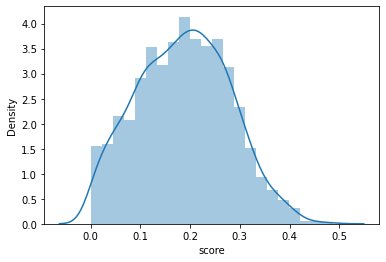

In [54]:
import seaborn as sns
sns_plot = sns.distplot(users_score['score'])
fig = sns_plot.get_figure()

Например у 776 пользователей из 1700 оценка выше чем 0.2, можно их позвать

In [58]:
users_score[users_score['score'] > 0.2].count()

techno/all     776
techno_pos     776
total_hours    776
score          776
dtype: int64